In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [104]:
df=pd.read_csv(r"C:\Users\User\Desktop\weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [105]:
pd.set_option('display.max_columns',None)
df.head()


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [106]:
df.shape

(8425, 23)

In [107]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

### we can see that in Evaporation and Sunshine columns 41% and 47% value are missing so we dont fill this value so we drop this 2 columns

In [108]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [109]:
df.nunique().to_frame("No.of unique values")

No.of unique values
Date                          3004
Location                        12
MinTemp                        285
MaxTemp                        331
Rainfall                       250
Evaporation                    116
Sunshine                       140
WindGustDir                     16
WindGustSpeed                   52
WindDir9am                      16
WindDir3pm                      16
WindSpeed9am                    34
WindSpeed3pm                    35
Humidity9am                     90
Humidity3pm                     94
Pressure9am                    384
Pressure3pm                    374
Cloud9am                         9
Cloud3pm                         9
Temp9am                        304
Temp3pm                        328
RainToday                        2
RainTomorrow                     2

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

### we can see that in the forecasting of rain tomorrow and rain fall quantity the Date is no add weightage so we can drop the column

In [111]:
# Dropping the Date column
df = df.drop(columns=['Date'])
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0           44.0          W        WNW          20.0          24.0   
1           44.0        NNW        WSW           4.0          22.0   
2           46.0          W        WSW          19.0          26.0   
3           24.0         SE          E          11.0           9.0   
4           41.0        ENE         NW           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         71.0         22.0       1007.7       1007.1       8.0       NaN   
1         44.0         25.0       1010.6       1007.8       NaN       NaN   
2         38.0         30.0       1007.6       1008.7       NaN       2.0   
3         45.0         16.0       1017.6       1012.8       NaN       NaN   
4         82.0         33.0       1010.8       1006.0       7.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     16.9     21.8        No           No  
1     17.2     24.3        No           No  
2     21.0     23.2        No           No  
3     18.1     26.5        No           No  
4     17.8     29.7        No           No

In [112]:
#Drop the Evaporation column bcz 41% missing value in this dataset
df = df.drop(columns=['Evaporation'])
df.head()

Location  MinTemp  MaxTemp  Rainfall  Sunshine WindGustDir  WindGustSpeed  \
0   Albury     13.4     22.9       0.6       NaN           W           44.0   
1   Albury      7.4     25.1       0.0       NaN         WNW           44.0   
2   Albury     12.9     25.7       0.0       NaN         WSW           46.0   
3   Albury      9.2     28.0       0.0       NaN          NE           24.0   
4   Albury     17.5     32.3       1.0       NaN           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0          W        WNW          20.0          24.0         71.0         22.0   
1        NNW        WSW           4.0          22.0         44.0         25.0   
2          W        WSW          19.0          26.0         38.0         30.0   
3         SE          E          11.0           9.0         45.0         16.0   
4        ENE         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8        No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3        No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2        No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5        No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

In [113]:
#Drop the Sunshine column bcz 47% missing valuein this column
df = df.drop(columns=['Sunshine'])
df.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed WindDir9am  \
0   Albury     13.4     22.9       0.6           W           44.0          W   
1   Albury      7.4     25.1       0.0         WNW           44.0        NNW   
2   Albury     12.9     25.7       0.0         WSW           46.0          W   
3   Albury      9.2     28.0       0.0          NE           24.0         SE   
4   Albury     17.5     32.3       1.0           W           41.0        ENE   

  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0        WNW          20.0          24.0         71.0         22.0   
1        WSW           4.0          22.0         44.0         25.0   
2        WSW          19.0          26.0         38.0         30.0   
3          E          11.0           9.0         45.0         16.0   
4         NW           7.0          20.0         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8        No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3        No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2        No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5        No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7        No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No

In [114]:
df.isnull().mean()*100

Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

### Lets fill the missing value

In [115]:
for col in df.columns:
    if col not in ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']:
        df[col]=df[col].replace(np.nan,df[col].mean())
    

In [116]:
df.isnull().sum()

Location           0
MinTemp            0
MaxTemp            0
Rainfall           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In [117]:
df['WindGustDir'].value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [118]:
df['WindGustDir'].fillna('N',inplace=True)

In [119]:
df['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [120]:
df['WindDir9am'].fillna('N',inplace=True)

In [121]:
df['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [122]:
df['WindDir3pm'].fillna('SE',inplace=True)

In [123]:
df['RainToday'].value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [124]:
df['RainToday'].fillna('No',inplace=True)

In [125]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [126]:
df['RainTomorrow'].fillna('No',inplace=True)

In [127]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [128]:
###Lets see the statistical summary
df.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  8425.000000  8425.000000  8425.000000    8425.000000   8425.000000   
mean     13.193305    23.859976     2.805913      40.174469     13.847646   
std       5.379488     6.114516    10.309308      13.776101     10.128579   
min      -2.000000     8.200000     0.000000       7.000000      0.000000   
25%       9.300000    19.300000     0.000000      31.000000      6.000000   
50%      13.200000    23.300000     0.000000      40.174469     13.000000   
75%      17.300000    28.000000     1.400000      48.000000     20.000000   
max      28.500000    45.500000   371.000000     107.000000     63.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean      18.533662    67.822496    51.249790  1017.640233  1015.236075   
std        9.704759    16.774231    18.311894     6.275759     6.217451   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%       11.000000    56.000000    39.000000  1014.000000  1011.400000   
50%       19.000000    68.000000    51.000000  1017.640233  1015.236075   
75%       24.000000    80.000000    63.000000  1021.300000  1018.800000   
max       83.000000   100.000000    99.000000  1039.000000  1036.000000   

          Cloud9am     Cloud3pm      Temp9am      Temp3pm  
count  8425.000000  8425.000000  8425.000000  8425.000000  
mean      4.566622     4.503183    17.762015    22.442934  
std       2.429205     2.299419     5.608301     5.945849  
min       0.000000     0.000000     1.900000     7.300000  
25%       3.000000     3.000000    13.800000    18.100000  
50%       4.566622     4.503183    17.762015    22.000000  
75%       7.000000     7.000000    21.900000    26.300000  
max       8.000000     8.000000    39.400000    44.100000

### from the above description we can observe the following:-

### After filling the  missing value we can see that count of all value is not same which means there is missing values in the dataset.

### The median(50%)value is grater than the mean in windspeed3pm,humidity9am columns which means the data is skewed to left in the column

### in rest of the column the data is skewed to right  .

### By summarizing the data we can observe that in some of the column there is a huge difference between 75% and max hence there are outliers present in the data.

### we can also notice the standar devition ,minimum value ,25% percentile values from this describe.

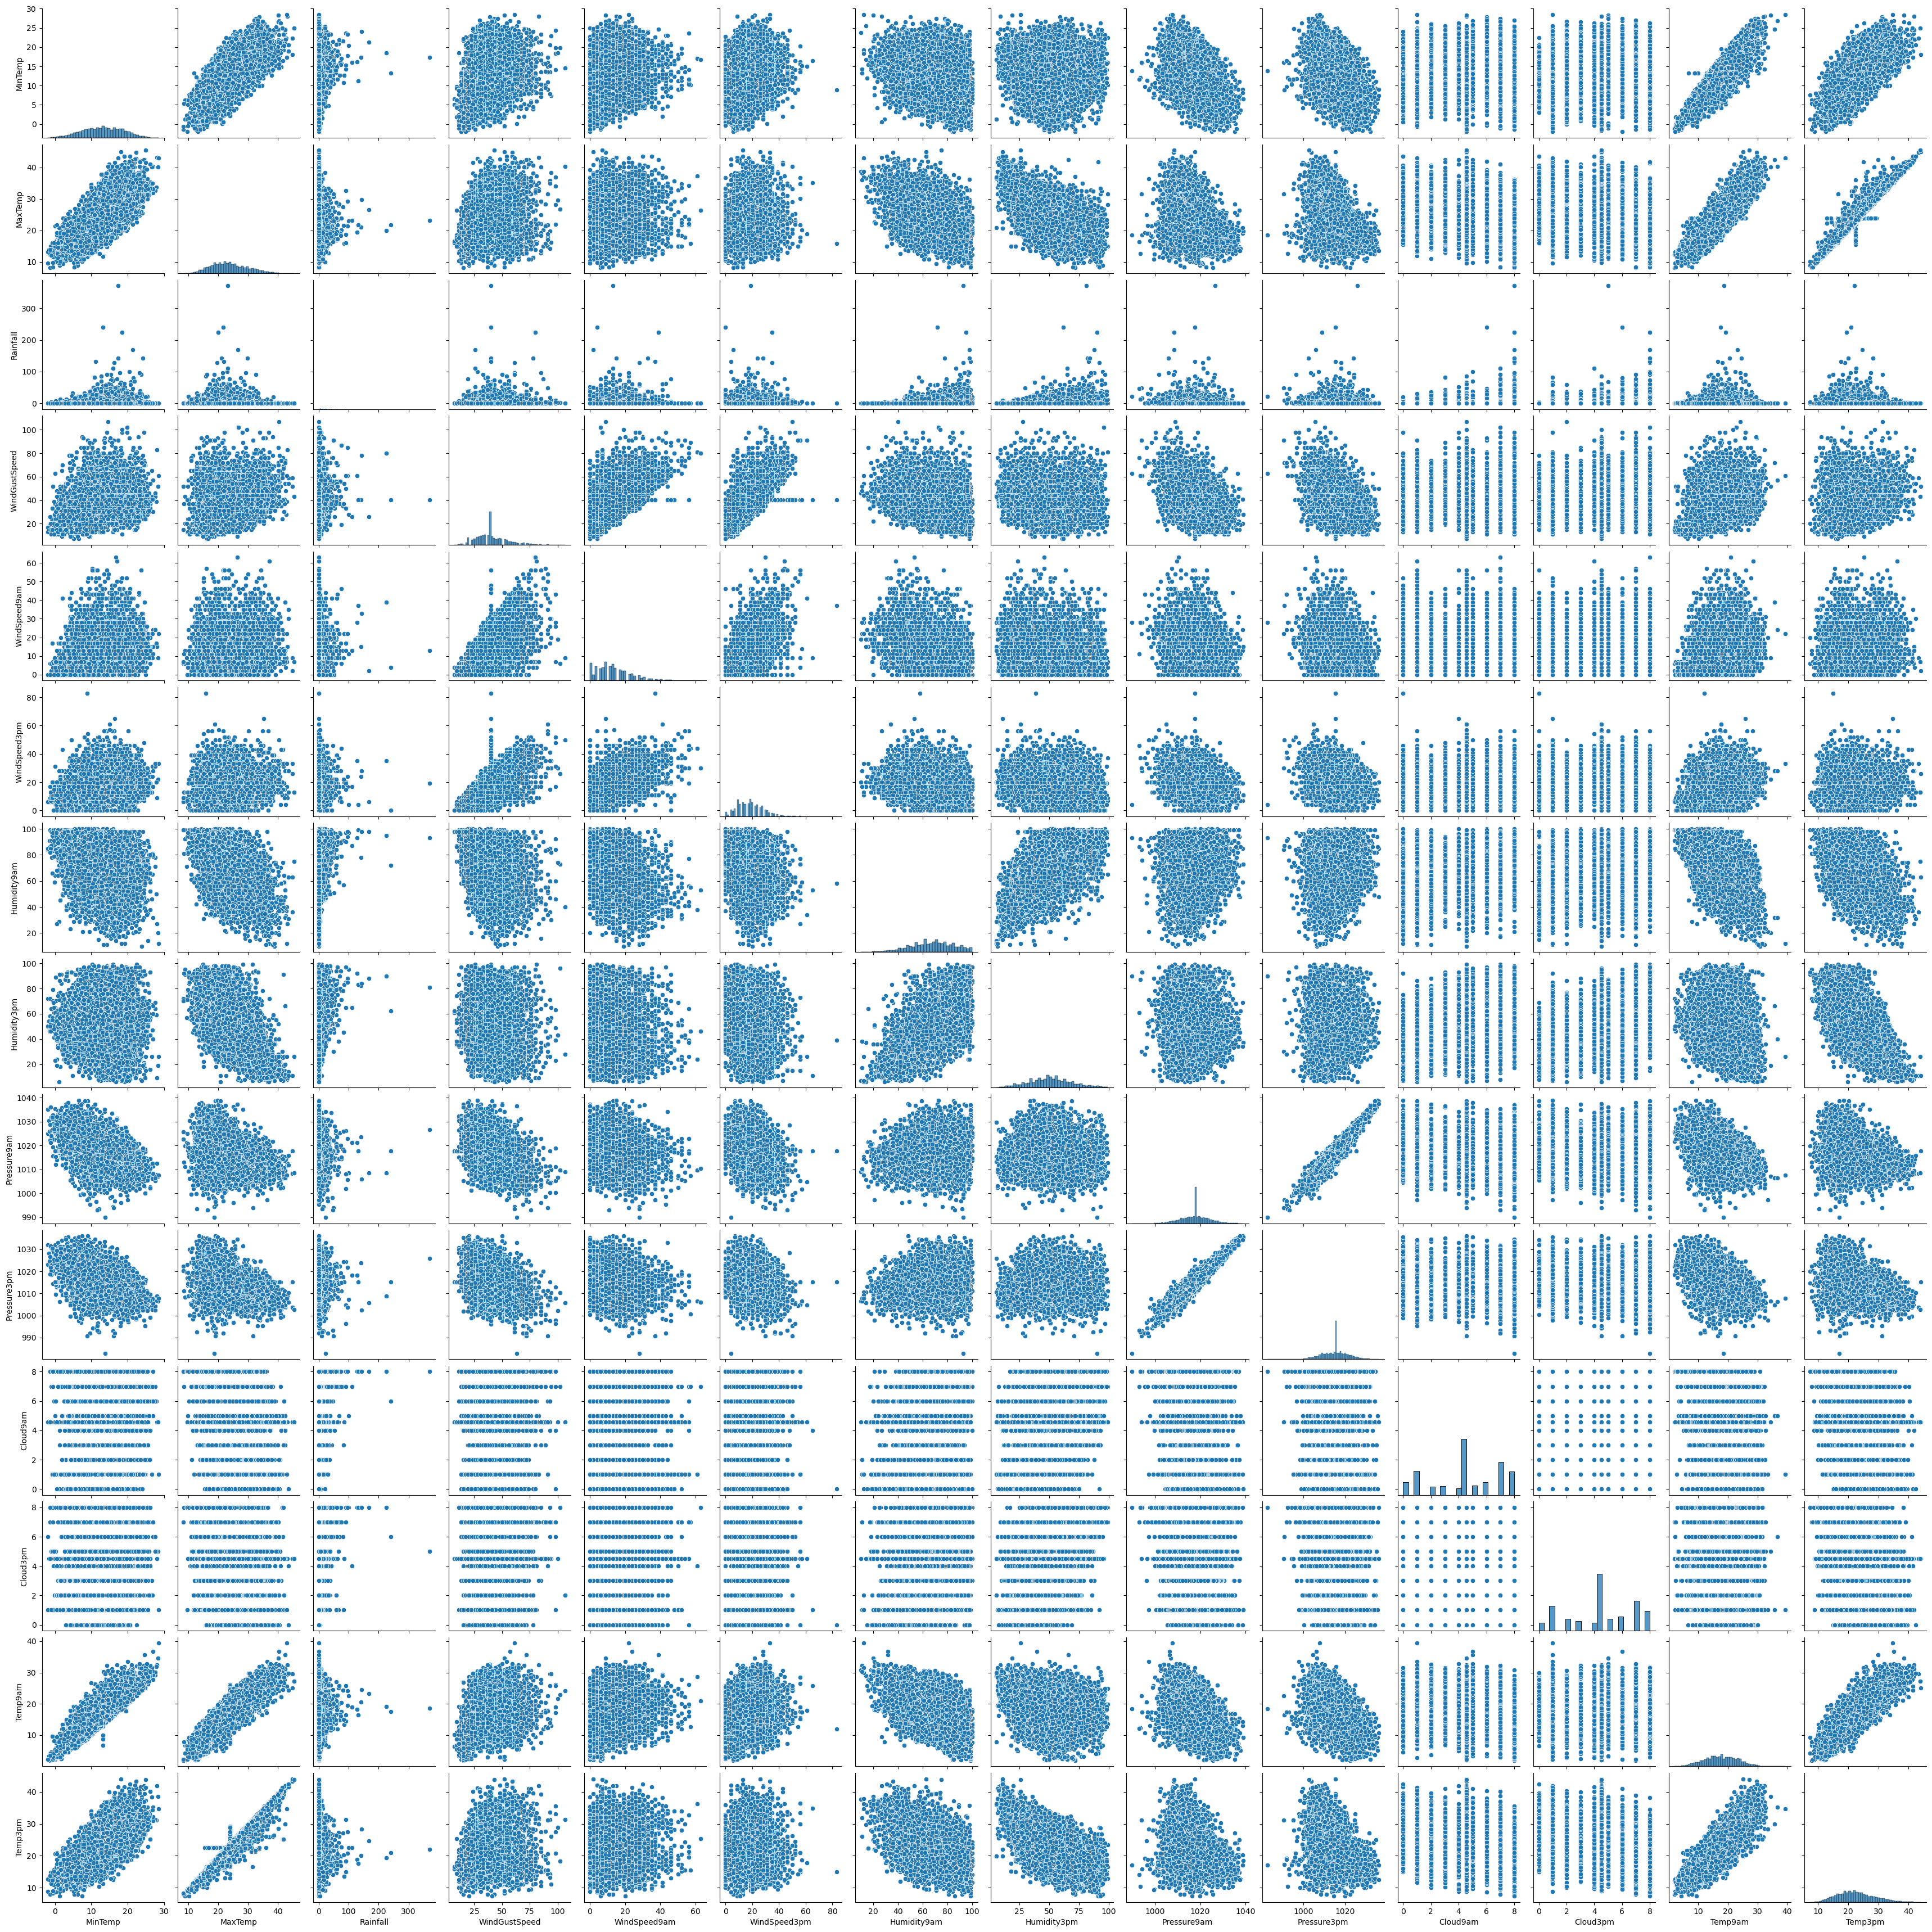

In [27]:
sns.pairplot(data=df,palette="Dark2")

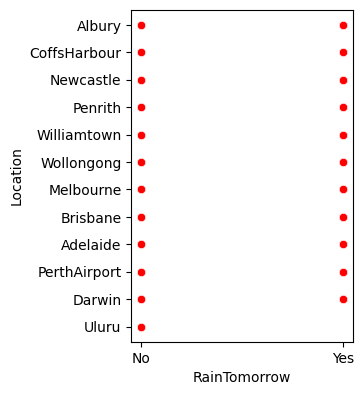

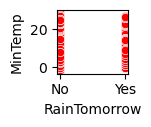

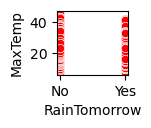

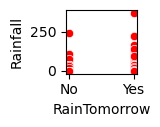

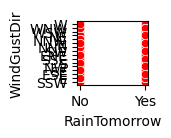

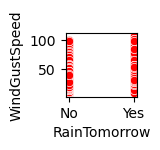

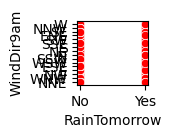

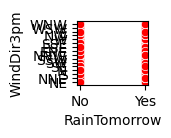

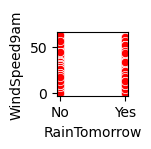

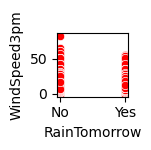

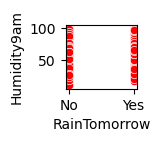

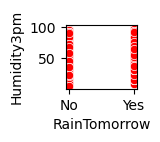

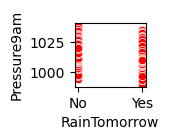

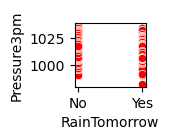

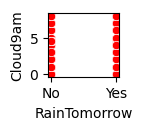

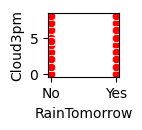

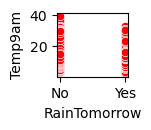

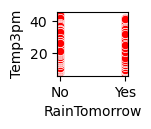

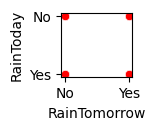

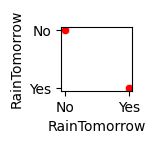

In [28]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df:
    if plotnumber<=30:
        plt.subplot(5,6,plotnumber)
        sns.scatterplot(x='RainTomorrow',y=i,data=df,color='r')
        
    plotnumber+=1
    plt.show()
    
    

In [129]:
### lets encoding the catogerical column
from sklearn.preprocessing import LabelEncoder
encoding_cols=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
label_encoders={}
for column in encoding_cols:
    label_encoders[column]=LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])

In [130]:
df.head(20)

Location  MinTemp  MaxTemp   Rainfall  WindGustDir  WindGustSpeed  \
0          1     13.4     22.9   0.600000           13      44.000000   
1          1      7.4     25.1   0.000000           14      44.000000   
2          1     12.9     25.7   0.000000           15      46.000000   
3          1      9.2     28.0   0.000000            4      24.000000   
4          1     17.5     32.3   1.000000           13      41.000000   
5          1     14.6     29.7   0.200000           14      56.000000   
6          1     14.3     25.0   0.000000           13      50.000000   
7          1      7.7     26.7   0.000000           13      35.000000   
8          1      9.7     31.9   0.000000            6      80.000000   
9          1     13.1     30.1   1.400000           13      28.000000   
10         1     13.4     30.4   0.000000            3      30.000000   
11         1     15.9     21.7   2.200000            5      31.000000   
12         1     15.9     18.6  15.600000           13      61.000000   
13         1     12.6     21.0   3.600000           12      44.000000   
14         1      8.4     24.6   0.000000            3      40.174469   
15         1      9.8     27.7   2.805913           14      50.000000   
16         1     14.1     20.9   0.000000            1      22.000000   
17         1     13.5     22.9  16.800000           13      63.000000   
18         1     11.2     22.5  10.600000           10      43.000000   
19         1      9.8     25.6   0.000000           10      26.000000   

    WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           13          14     20.000000          24.0         71.0   
1            6          15      4.000000          22.0         44.0   
2           13          15     19.000000          26.0         38.0   
3            9           0     11.000000           9.0         45.0   
4            1           7      7.000000          20.0         82.0   
5           13          13     19.000000          24.0         55.0   
6           12          13     20.000000          24.0         49.0   
7           10          13      6.000000          17.0         48.0   
8            9           7      7.000000          28.0         42.0   
9            8          10     15.000000          11.0         58.0   
10          10           2     17.000000           6.0         48.0   
11           4           1     15.000000          13.0         89.0   
12           6           6     28.000000          28.0         76.0   
13          13          11     24.000000          20.0         65.0   
14           8          14      4.000000          30.0         57.0   
15           3          14     13.847646          22.0         50.0   
16          11           0     11.000000           9.0         69.0   
17           3          14      6.000000          20.0         80.0   
18          15          12     24.000000          17.0         47.0   
19           9           6     17.000000           6.0         45.0   

    Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0          22.0       1007.7       1007.1  8.000000  4.503183     16.9   
1          25.0       1010.6       1007.8  4.566622  4.503183     17.2   
2          30.0       1007.6       1008.7  4.566622  2.000000     21.0   
3          16.0       1017.6       1012.8  4.566622  4.503183     18.1   
4          33.0       1010.8       1006.0  7.000000  8.000000     17.8   
5          23.0       1009.2       1005.4  4.566622  4.503183     20.6   
6          19.0       1009.6       1008.2  1.000000  4.503183     18.1   
7          19.0       1013.4       1010.1  4.566622  4.503183     16.3   
8           9.0       1008.9       1003.6  4.566622  4.503183     18.3   
9          27.0       1007.0       1005.7  4.566622  4.503183     20.1   
10         22.0       1011.8       1008.7  4.566622  4.503183     20.4   
11         91.0       1010.5       1004.2  8.000000  8.000000     15.9   
12         93.0 

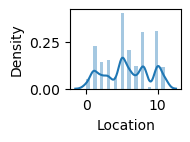

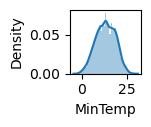

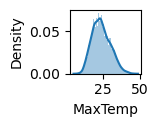

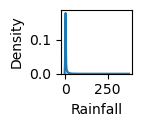

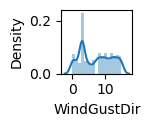

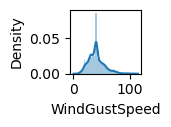

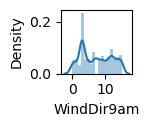

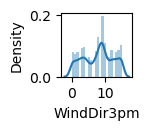

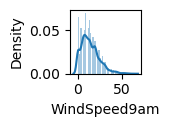

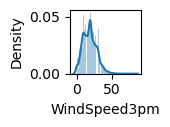

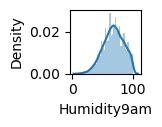

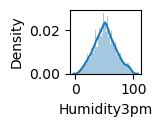

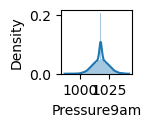

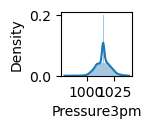

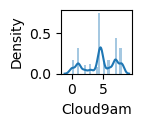

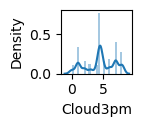

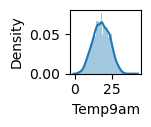

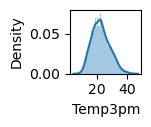

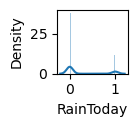

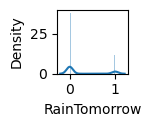

In [131]:
### Lets see how the data is distributed in each column
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()


In [132]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
dtype: float64

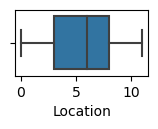

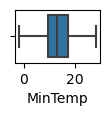

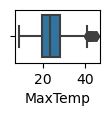

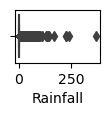

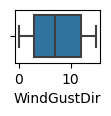

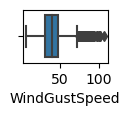

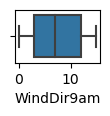

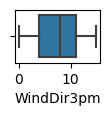

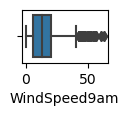

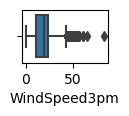

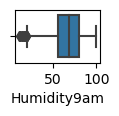

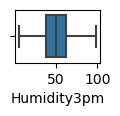

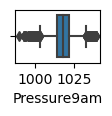

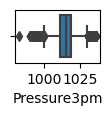

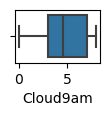

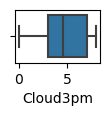

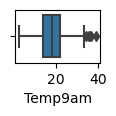

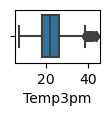

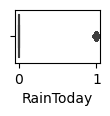

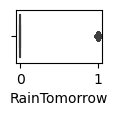

In [133]:
### we can see in some of the column data is skewed so lets see after removing the outliers if the data is skewed or not
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=30:
        ax=plt.subplot(6,5,plotnumber)
        sns.boxplot(df[col])
        
        plotnumber+=1
        plt.show()

### we can see there is outliers in Maxtemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,pressure3pm,Temp9am,Temp3pm,RainToday.

### Although we can see that outliers present in the RainTomorrow and Rainfall but this 2 are lable so we dont remove outliers in those columns.

In [134]:
from scipy.stats import zscore
out_features=df[['MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainToday']]
z=np.abs(zscore(out_features))
z

MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0     1.570089e-01       0.277710      0.607461      0.563297     0.189439   
1     2.028121e-01       0.277710      0.972321      0.357200     1.420268   
2     3.009450e-01       0.422897      0.508725      0.769394     1.777981   
3     6.771214e-01       1.174166      0.281166      0.982428     1.360650   
4     1.380408e+00       0.059928      0.676112      0.151104     0.845246   
...            ...            ...           ...           ...          ...   
8420  7.523137e-02       0.666009      0.083694      0.776331     1.002937   
8421  2.355231e-01       1.319354      0.083694      0.982428     0.704843   
8422  4.972110e-01       0.230447      0.478639      0.982428     0.883699   
8423  5.135665e-01       0.883791      0.083694      1.188525     1.002937   
8424  2.905320e-15       0.000000      0.311252      0.158041     0.347130   

      Pressure9am  Pressure3pm   Temp9am   Temp3pm  RainToday  
0        1.584003     1.308665  0.153712  0.108138   0.556099  
1        1.121880     1.196072  0.100217  0.312348   0.556099  
2        1.599939     1.051309  0.577390  0.127334   0.556099  
3        0.006411     0.391836  0.060269  0.682376   0.556099  
4        1.090010     1.485596  0.006773  1.220599   0.556099  
...           ...          ...       ...       ...        ...  
8420     1.109058     0.814518  1.366273  0.007221   0.556099  
8421     0.933770     0.621501  1.223619  0.345987   0.556099  
8422     0.535388     0.251553  0.938310  0.615099   0.556099  
8423     0.280424     0.203299  0.474684  0.598279   0.556099  
8424     0.407906     0.428485  0.492516  0.259513   0.556099  

[8425 rows x 10 columns]

In [135]:
np.where(z>3)

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
          62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
         406,  407,  407,  563,  568,  568,  569,  602,  683,  683,  748,
         748,  980,  980, 1189, 1535, 1587, 1644, 1665, 1898, 1903, 1945,
        2016, 2028, 2043, 2074, 2186, 2219, 2219, 2230, 2500, 2505, 2527,
        2527, 2859, 3051, 3058, 3059, 3059, 3060, 3066, 3067, 3067, 3067,
        3068, 3070, 3082, 3082, 3082, 3089, 3089, 3099, 3099, 3141, 3153,
        3167, 3172, 3212, 3212, 3234, 3271, 3278, 3278, 3291, 3291, 3302,
        3302, 3303, 3449, 3449, 3449, 3450, 3450, 3458, 3471, 3491, 3557,
        3602, 3603, 3617, 3711, 3903, 3910, 3911, 3911, 3912, 3918, 3919,
        3919, 3919, 3920, 3922, 3934, 3934, 3934, 3941, 3941, 3951, 3951,
        3993, 4005, 4019, 4024, 4064, 4064, 4086, 4123, 4130, 4130, 4143,
        4143, 4154, 4154, 4155, 4301, 4301, 4301, 4302, 4302, 4310, 4323,
        4343, 4409, 4454, 4455, 4469, 

In [136]:
df1=df[(z<3).all(axis=1)]
df1.shape

(8173, 20)

In [137]:
df.shape

(8425, 20)

In [138]:
#shape of old and new DataFrame
print("old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

old Data Frame- 8425
New Data Frame- 8173


In [139]:
print("data loss percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage- 2.9910979228486645


In [140]:
df=df1

### After removing the outliers let see how the data is distributed in each columns

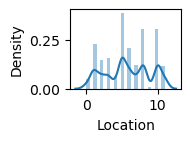

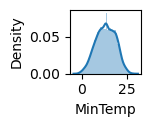

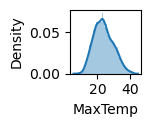

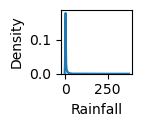

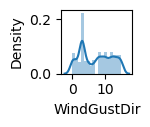

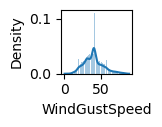

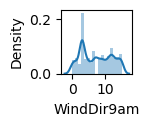

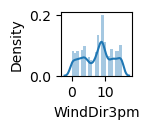

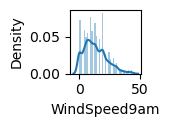

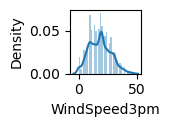

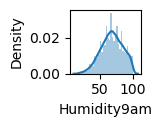

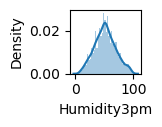

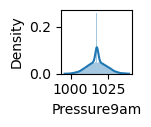

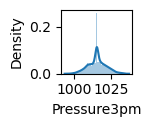

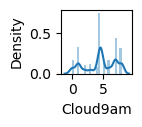

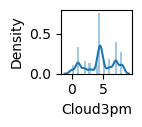

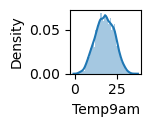

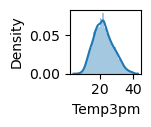

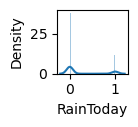

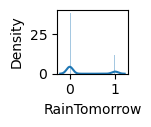

In [141]:
plt.figure(figsize=(10,6))
plotnumber=1

for col in df:
    if plotnumber<=30:
        ax=plt.subplot(5,6,plotnumber)
        sns.distplot(df[col])
        
        plotnumber+=1
        plt.show()


In [142]:
df.skew()

Location         -0.048766
MinTemp          -0.101408
MaxTemp           0.316003
Rainfall         13.734525
WindGustDir       0.108721
WindGustSpeed     0.512319
WindDir9am        0.151489
WindDir3pm       -0.127670
WindSpeed9am      0.713808
WindSpeed3pm      0.296671
Humidity9am      -0.233591
Humidity3pm       0.128342
Pressure9am       0.018710
Pressure3pm       0.045774
Cloud9am         -0.364840
Cloud3pm         -0.269755
Temp9am          -0.046349
Temp3pm           0.334945
RainToday         1.234785
RainTomorrow      1.259619
dtype: float64

### we can see after rmoving the outliers the data is skewed in Rainfall,Windspeed9am,RainfallToday,RainfallTomorrow

#### Although RainFall and RainTomorrow is the lable so we dont remove the skewness in these 2 columns



In [143]:
#removing skewness using cuberoot method
df['WindSpeed9am']=np.sqrt(df['WindSpeed9am'])

In [144]:
#removing skewness using cuberoot method
df['RainToday']=np.sqrt(df['RainToday'])

In [145]:
df.skew()

Location         -0.048766
MinTemp          -0.101408
MaxTemp           0.316003
Rainfall         13.734525
WindGustDir       0.108721
WindGustSpeed     0.512319
WindDir9am        0.151489
WindDir3pm       -0.127670
WindSpeed9am     -0.520675
WindSpeed3pm      0.296671
Humidity9am      -0.233591
Humidity3pm       0.128342
Pressure9am       0.018710
Pressure3pm       0.045774
Cloud9am         -0.364840
Cloud3pm         -0.269755
Temp9am          -0.046349
Temp3pm           0.334945
RainToday         1.234785
RainTomorrow      1.259619
dtype: float64

In [146]:
df.corr()

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Location       1.000000  0.115281  0.066411  0.006356    -0.038918   
MinTemp        0.115281  1.000000  0.714868  0.089424    -0.152416   
MaxTemp        0.066411  0.714868  1.000000 -0.084379    -0.233949   
Rainfall       0.006356  0.089424 -0.084379  1.000000     0.035733   
WindGustDir   -0.038918 -0.152416 -0.233949  0.035733     1.000000   
WindGustSpeed  0.244222  0.229780  0.133141  0.082546     0.011021   
WindDir9am    -0.036361 -0.042474 -0.215768  0.090214     0.404104   
WindDir3pm    -0.034595 -0.156347 -0.193360  0.033899     0.509261   
WindSpeed9am   0.230761  0.169609  0.027018  0.052297     0.093827   
WindSpeed3pm   0.235644  0.183386  0.090643  0.025144     0.107344   
Humidity9am    0.004166 -0.116879 -0.381420  0.222777     0.029201   
Humidity3pm    0.056813  0.097058 -0.409457  0.231892     0.048577   
Pressure9am   -0.024870 -0.432308 -0.334020 -0.053676    -0.101234   
Pressure3pm   -0.013410 -0.426275 -0.416039 -0.012991    -0.014074   
Cloud9am       0.038913  0.095779 -0.254325  0.182095     0.119741   
Cloud3pm       0.020633  0.042823 -0.249088  0.145718     0.091687   
Temp9am        0.119357  0.887562  0.863892 -0.003448    -0.183302   
Temp3pm        0.063345  0.683323  0.974816 -0.087953    -0.246121   
RainToday      0.002845  0.070145 -0.221693  0.459441     0.119574   
RainTomorrow   0.004530  0.095937 -0.152247  0.216291     0.045129   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
Location            0.244222   -0.036361   -0.034595      0.230761   
MinTemp             0.229780   -0.042474   -0.156347      0.169609   
MaxTemp             0.133141   -0.215768   -0.193360      0.027018   
Rainfall            0.082546    0.090214    0.033899      0.052297   
WindGustDir         0.011021    0.404104    0.509261      0.093827   
WindGustSpeed       1.000000   -0.063956    0.078543      0.509876   
WindDir9am         -0.063956    1.000000    0.245974      0.174057   
WindDir3pm          0.078543    0.245974    1.000000      0.038173   
WindSpeed9am        0.509876    0.174057    0.038173      1.000000   
WindSpeed3pm        0.626916    0.059884    0.078464      0.541001   
Humidity9am        -0.255760    0.015289   -0.008152     -0.356039   
Humidity3pm        -0.079190    0.120280   -0.009952     -0.087530   
Pressure9am        -0.377397   -0.007003   -0.131515     -0.146556   
Pressure3pm        -0.335337    0.079428   -0.038433     -0.105874   
Cloud9am            0.018921    0.097453    0.072816     -0.002127   
Cloud3pm            0.068650    0.062723    0.053302      0.038548   
Temp9am             0.196614   -0.101247   -0.176201      0.142286   
Temp3pm             0.098505   -0.223045   -0.205442      0.010271   
RainToday           0.082664    0.155233    0.099905      0.045767   
RainTomorrow        0.185113    0.032833    0.006603      0.058030   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Location           0.235644     0.004166     0.056813    -0.024870   
MinTemp            0.183386    -0.116879     0.097058    -0.432308   
MaxTemp            0.090643    -0.381420    -0.409457    -0.334020   
Rainfall           0.025144     0.222777     0.231892    -0.053676   
WindGustDir        0.107344     0.029201     0.048577    -0.101234   
WindGustSpeed      0.626916    -0.255760    -0.079190    -0.377397   
WindDir9am         0.059884     0.015289     0.120280    -0.007003   
WindDir3pm         0.078464    -0.008152    -0.009952    -0.131515   
WindSpeed9am       0.541001    -0.356039    -0.087530    -0.146556   
WindSpeed3pm       1.000000    -0.240467    -0.080078    -0.228216   
Humidity9am       -0.240467     1.000000     0.631929     0.132167   
Humidity3pm       -0.080078     0.631929     1.000000    -0.004359   
Pressure9am       -0.228216     0.132167    -0.004359     1.000000   
Pressure3pm       -0.174979     0.164790     0.067563     0.959698   
Cloud9am           0.00

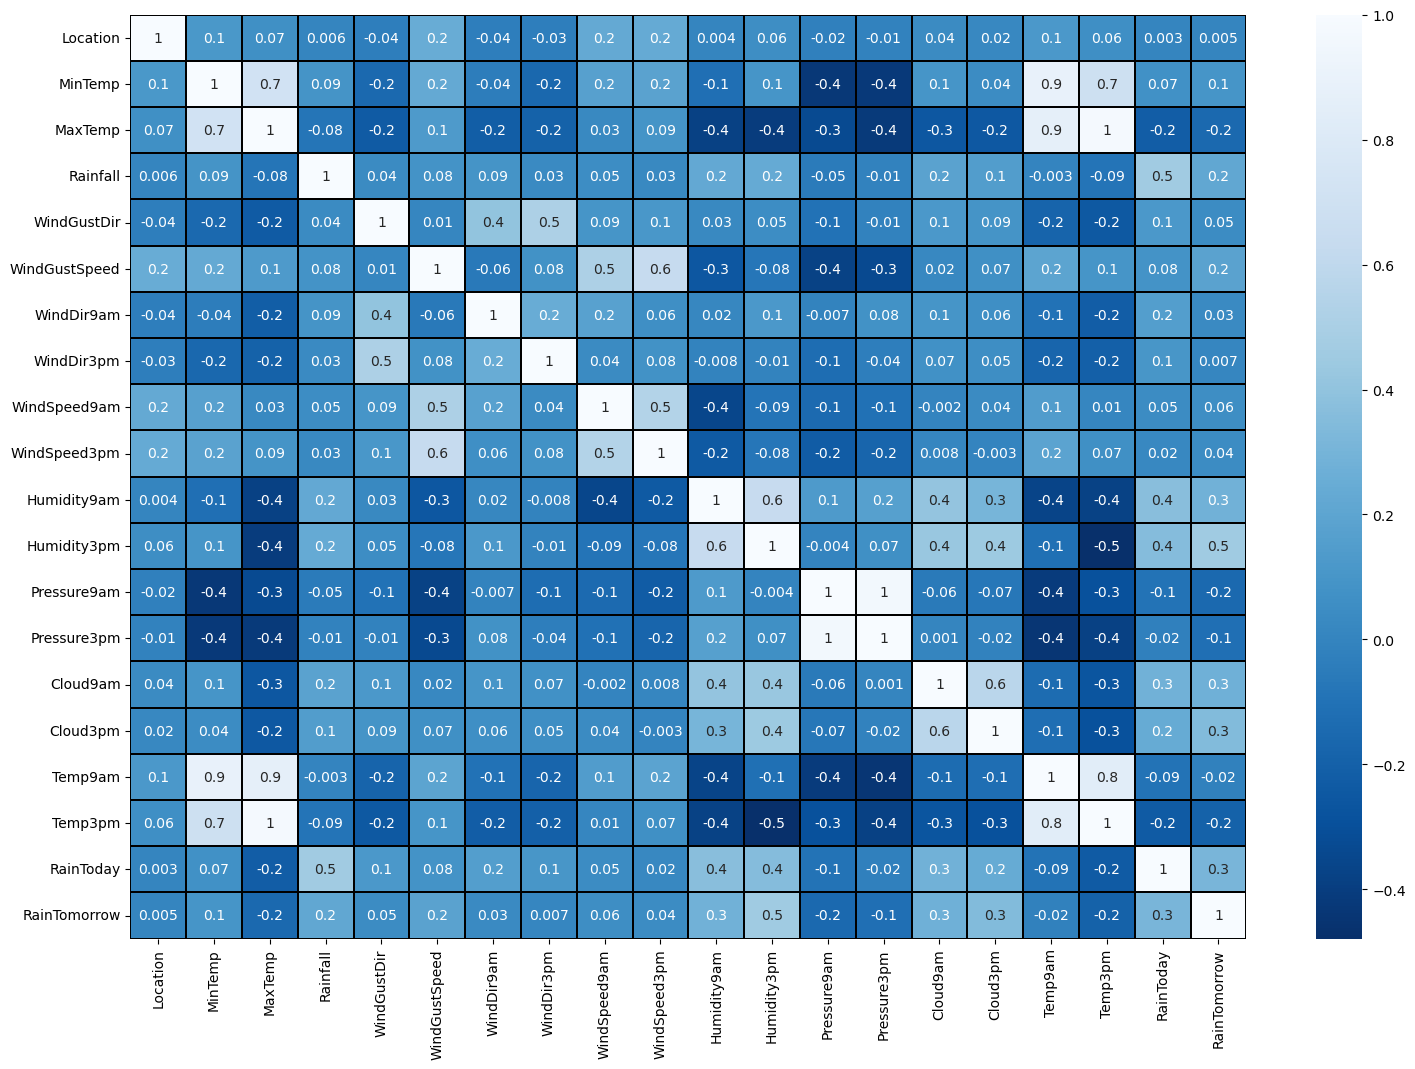

In [147]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.show()

### This heatmap show the corelation matrix by visualizing the data .we can observe the relation between feature to feature and feature to lable in the heat map.

### This heatmap contains both positive and negative corelation.

### we can see that the features Humidity9am high  positively corelated with lable RainTomorrow.

### we can see that the features RainToday highly positive corelated with lable RainFall.

### we cans see that the features Temp9am is  very much less contribute to the lable RainFall .

### we can see that the features pressure 9am and presure 3pm and Temp3pm and maxtemp are perfectly positively related with each other.

### we can see that the features Temp 9am and MIntemp and  and  Temp9am and maxtemp  and Temp9am and temp3pm are very much highly positively corelated with each other  .



### From the above see can see that if there is multicolinearity issue present in this dataset or not.¶

### visualizing the corelation between lable and features using barplot

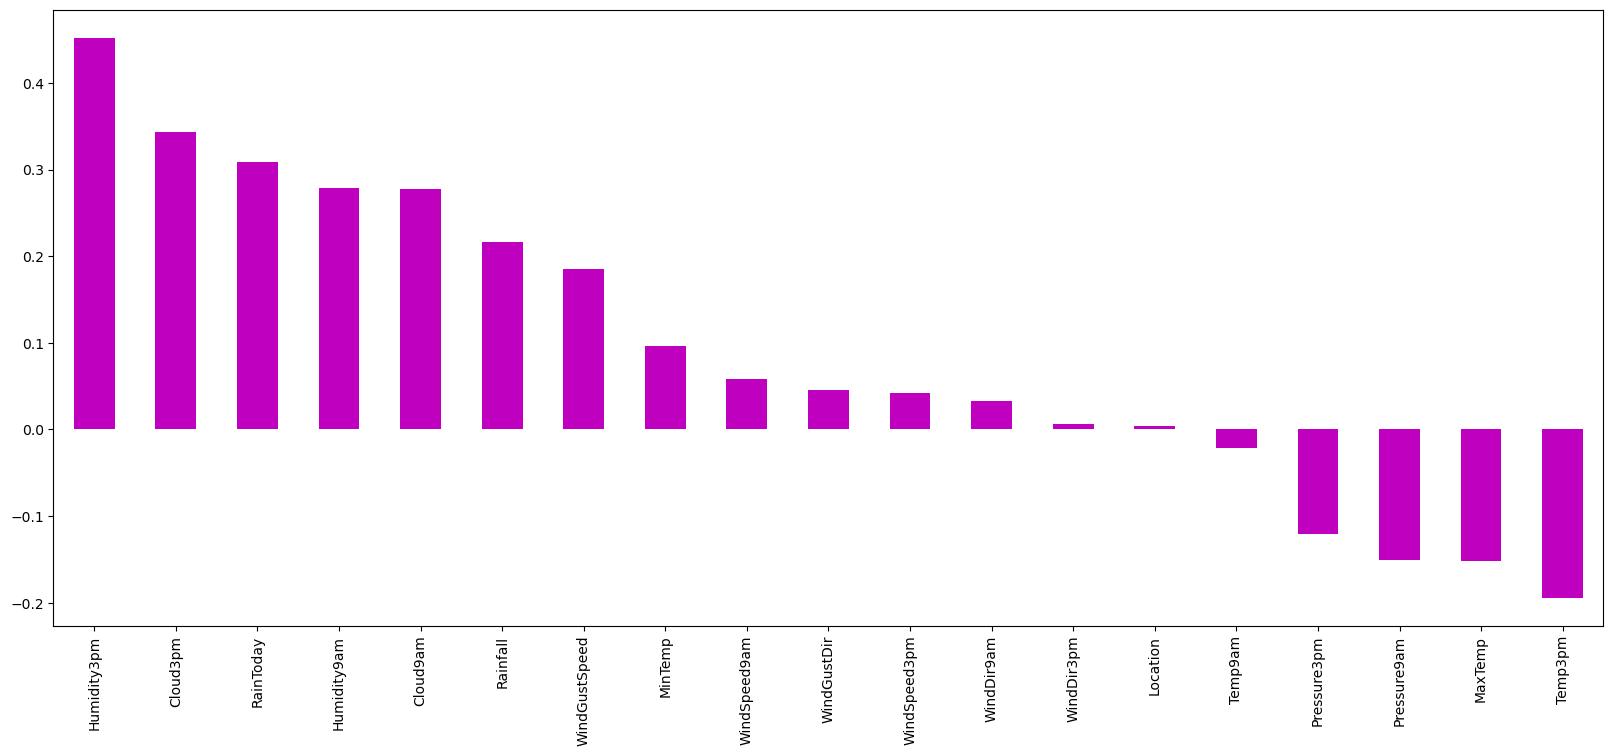

In [148]:
plt.figure(figsize=(20,8))
df.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='m')
plt.show()

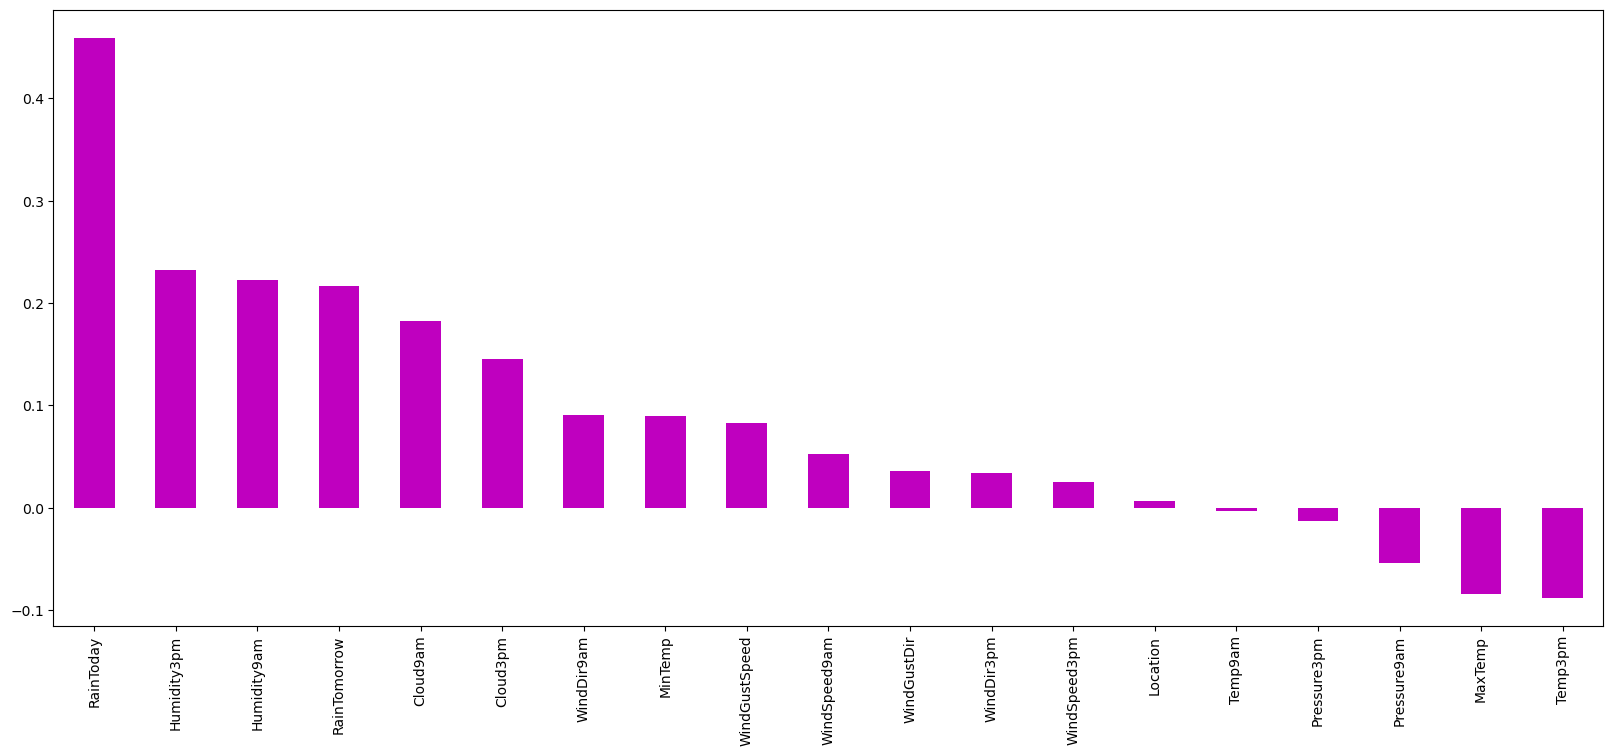

In [149]:
plt.figure(figsize=(20,8))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='m')
plt.show()

In [150]:
x=df.drop(["RainTomorrow"],axis=1)
y=df['RainTomorrow']

print(x.shape)
print(y.shape)

(8173, 19)
(8173,)


In [151]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Location   MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0    -1.510600  0.044768 -0.149524 -0.213436     1.226883       0.356508   
1    -1.510600 -1.073251  0.217766 -0.272298     1.439452       0.356508   
2    -1.510600 -0.048400  0.317936 -0.272298     1.652021       0.512939   
3    -1.510600 -0.737845  0.701921 -0.272298    -0.686240      -1.207805   
4    -1.510600  0.808747  1.419807 -0.174195     1.226883       0.121861   
...        ...       ...       ...       ...          ...            ...   
8168  1.016109 -1.930398 -0.066049 -0.272298    -1.536517      -0.660295   
8169  1.016109 -1.781329  0.251156 -0.272298    -0.261101      -1.364236   
8170  1.016109 -1.445923  0.518276 -0.272298    -0.898809      -0.191002   
8171  1.016109 -0.998716  0.534971 -0.272298     0.376606      -0.894942   
8172  1.016109  0.324273  0.010744 -0.272298    -0.898809       0.057291   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0       1.240451    1.400263      0.756145      0.634179     0.172447   
1      -0.285501    1.626280     -0.867027      0.417650    -1.463054   
2       1.240451    1.626280      0.681795      0.850708    -1.826499   
3       0.368478   -1.763969     -0.002548     -0.989787    -1.402480   
4      -1.375466   -0.181853     -0.443035      0.201122     0.838762   
...          ...         ...           ...           ...          ...   
8168    0.368478   -1.537953      0.187157     -0.773258    -1.039035   
8169    0.368478   -1.085919      0.187157     -0.989787    -0.736165   
8170    0.368478    1.400263     -0.210440     -0.989787    -0.917887   
8171    0.586471   -1.085919      0.187157     -1.206315    -1.039035   
8172   -1.157473   -1.311936      0.526977     -0.123672    -0.372720   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0       -1.626639    -1.680298    -1.395240  1.411768  0.005237 -0.146706   
1       -1.461240    -1.196136    -1.277111 -0.000060  0.005237 -0.092632   
2       -1.185576    -1.696994    -1.125231 -0.000060 -1.082654  0.592315   
3       -1.957436    -0.027468    -0.433334 -0.000060  0.005237  0.069593   
4       -1.020177    -1.162746    -1.580871  1.000561  1.524965  0.015518   
...           ...          ...          ...       ...       ...       ...   
8168    -1.516373     1.141200     0.832332 -0.000060  0.005237 -1.372400   
8169    -1.681772     0.957552     0.629825 -0.000060  0.005237 -1.228201   
8170    -1.516373     0.540170     0.241688 -0.000060  0.005237 -0.939802   
8171    -1.516373     0.273046     0.191061 -0.644266 -1.082654 -0.471155   
8172    -0.854779     0.406608     0.427319  1.411768  1.524965 -0.489180   

       Temp3pm  RainToday  
0    -0.101953  -0.557895  
1     0.327057  -0.557895  
2     0.138293  -0.557895  
3     0.704587  -0.557895  
4     1.253720  -0.557895  
...        ...        ...  
8168  0.001009  -0.557895  
8169  0.361378  -0.557895  
8170  0.635945  -0.557895  
8171  0.618785  -0.557895  
8172 -0.256397  -0.557895  

[8173 rows x 19 columns]

### checking the variance inflation factor

In [152]:
#finding the vif in scaleed column the formula is (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values       Features
0     1.149447       Location
1     8.181167        MinTemp
2    26.058033        MaxTemp
3     1.298690       Rainfall
4     1.596288    WindGustDir
5     2.200492  WindGustSpeed
6     1.365464     WindDir9am
7     1.480358     WindDir3pm
8     1.898016   WindSpeed9am
9     1.970653   WindSpeed3pm
10    3.811678    Humidity9am
11    5.376333    Humidity3pm
12   19.650330    Pressure9am
13   18.840862    Pressure3pm
14    1.816918       Cloud9am
15    1.667657       Cloud3pm
16   16.880352        Temp9am
17   32.864780        Temp3pm
18    1.562610      RainToday

### we can see that in some of the columns the vif values are grater than 10 so the issue of multicolinearity present.

### The Vif value of Temp3pm is 32 is the highest.so lets drop this column and lets see if further multicolinearity issue present or not

In [153]:

x.drop("Temp3pm",axis=1,inplace=True)

In [154]:
# after droping the temp3pm column lets see if there is any multicolinearity present further
#finding the vif in scaleed column the formula is (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values       Features
0     1.147294       Location
1     8.113236        MinTemp
2     9.326847        MaxTemp
3     1.295761       Rainfall
4     1.593435    WindGustDir
5     2.189112  WindGustSpeed
6     1.364584     WindDir9am
7     1.479459     WindDir3pm
8     1.897994   WindSpeed9am
9     1.968037   WindSpeed3pm
10    3.349175    Humidity9am
11    3.622276    Humidity3pm
12   19.074472    Pressure9am
13   18.357855    Pressure3pm
14    1.816302       Cloud9am
15    1.658264       Cloud3pm
16   15.641934        Temp9am
17    1.560696      RainToday

In [155]:
y.value_counts()

0    6264
1    1909
Name: RainTomorrow, dtype: int64

### Here we can see that data is not balanced,since it is a classifiction problem we will balance the data using oversampling method.

### oversampling

In [156]:
!pip install imblearn

In [157]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [158]:
y.value_counts()

0    6264
1    1909
Name: RainTomorrow, dtype: int64

In [159]:
y1.value_counts()

0    6264
1    6264
Name: RainTomorrow, dtype: int64

### Modeling

### finding the best randomstate

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy",maxAccu,"at Random state",maxRS)        
        

Best Accuracy 0.9358872040436286 at Random state 206


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

### RandomforestClassifier

In [163]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9364192604416068
[[1732  125]
 [ 114 1788]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1857
           1       0.93      0.94      0.94      1902

    accuracy                           0.94      3759
   macro avg       0.94      0.94      0.94      3759
weighted avg       0.94      0.94      0.94      3759



### LogisticRegression

In [164]:
#checking accuracy for randomforestclassifier
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7847831870178239
[[1490  367]
 [ 442 1460]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      1857
           1       0.80      0.77      0.78      1902

    accuracy                           0.78      3759
   macro avg       0.79      0.78      0.78      3759
weighted avg       0.79      0.78      0.78      3759



### SVC

In [166]:
svm=SVC()
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
print(accuracy_score(y_test,predsvm))
print(confusion_matrix(y_test,predsvm))
print(classification_report(y_test,predsvm))

0.8382548550146316
[[1538  319]
 [ 289 1613]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1857
           1       0.83      0.85      0.84      1902

    accuracy                           0.84      3759
   macro avg       0.84      0.84      0.84      3759
weighted avg       0.84      0.84      0.84      3759



### DecisionTreeClassifier

In [167]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT=DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.8627294493216281
[[1578  279]
 [ 237 1665]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1857
           1       0.86      0.88      0.87      1902

    accuracy                           0.86      3759
   macro avg       0.86      0.86      0.86      3759
weighted avg       0.86      0.86      0.86      3759



### GradientBosstingClassifier

In [168]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))

0.8592710827347699
[[1620  237]
 [ 292 1610]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1857
           1       0.87      0.85      0.86      1902

    accuracy                           0.86      3759
   macro avg       0.86      0.86      0.86      3759
weighted avg       0.86      0.86      0.86      3759



### AdaBoostClassifier

In [169]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=svm.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8382548550146316
[[1538  319]
 [ 289 1613]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1857
           1       0.83      0.85      0.84      1902

    accuracy                           0.84      3759
   macro avg       0.84      0.84      0.84      3759
weighted avg       0.84      0.84      0.84      3759



### Bagging Classifier

In [171]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9068901303538175
[[1705  152]
 [ 198 1704]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1857
           1       0.92      0.90      0.91      1902

    accuracy                           0.91      3759
   macro avg       0.91      0.91      0.91      3759
weighted avg       0.91      0.91      0.91      3759



In [172]:
#checking cv score for RandomForestClassifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predRFC) - score.mean())

[0.78731045 0.71667997 0.8782921  0.89620758 0.84391218]
0.8244804564852736
Differcnce between accuracy score and cross validation score is - 0.013774398529358023


In [173]:
#checking cv score for logisticRegression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predLR) - score.mean())

[0.67916999 0.72027135 0.65602554 0.75688623 0.82954092]
0.7283788050395618
Differcnce between accuracy score and cross validation score is - 0.05640438197826214


In [175]:
#checking cv score for svm
score=cross_val_score(svm,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predsvm) - score.mean())

[0.74181963 0.67996808 0.72665603 0.77045908 0.79441118]
0.7426627989033905
Differcnce between accuracy score and cross validation score is - 0.16209910585851428


In [176]:
#checking cv score for DecisionTreeClassifier
score=cross_val_score(DT,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predRFC) - score.mean())

[0.61572227 0.70590583 0.8810854  0.84510978 0.63473054]
0.7365107613981932
Differcnce between accuracy score and cross validation score is - 0.10174409361643844


In [177]:
#checking cv score for GradientBoostingClassifier
score=cross_val_score(GBC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predGBC) - score.mean())

[0.64804469 0.60614525 0.74541101 0.75728543 0.67105788]
0.685588854214954
Differcnce between accuracy score and cross validation score is - 0.17368222851981596


In [178]:
#checking cv score for AdaBoostClassifier
score=cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predABC) - score.mean())

[0.61093376 0.62410215 0.6839585  0.71457086 0.71656687]
0.6700264275917439
Differcnce between accuracy score and cross validation score is - 0.16822842742288768


In [179]:
#checking cv score for BaggingClassifier
score=cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Differcnce between accuracy score and cross validation score is -",accuracy_score(y_test,predBC) - score.mean())

[0.63607342 0.71548284 0.87909018 0.86626747 0.76087824]
0.7715584314212757
Differcnce between accuracy score and cross validation score is - 0.13533169893254182


### RandomForestClassifier is our best model as the difference between accuracy score and cross validation score is least.

### RandomForestClassifier is our Best model.

### Hyper parameter Tuning
​

In [180]:
from sklearn.model_selection import GridSearchCV

In [182]:
params = {'n_estimators':[10,12,14,16,18,20,22,23,45],
         'criterion':['entropy','gini'],
         'max_depth':[15,5,10,15,20,25,],
         'min_samples_split':[10,11,13,14,15],
         'min_samples_leaf':[5,6,7,8]
         }
grd = GridSearchCV(RFC,param_grid=params)
grd.fit(x_train,y_train)

print('best_params = > ',grd.best_params_)


best_params = >  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 45}


In [183]:
RFC = grd.best_estimator_

RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=45)

In [184]:
#checking accuracy for randomforestclassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9337589784517158
[[1730  127]
 [ 122 1780]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1857
           1       0.93      0.94      0.93      1902

    accuracy                           0.93      3759
   macro avg       0.93      0.93      0.93      3759
weighted avg       0.93      0.93      0.93      3759



In [185]:
import pickle
filename='Weather.pkl'
pickle.dump(RFC,open(filename,'wb'))

In [186]:
import pickle
loaded_model=pickle.load(open('Weather.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

93.37589784517158


In [187]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
conclusion

0     1     2     3     4     5     6     7     8     9     10    \
predicted     0     0     0     1     1     1     1     1     0     0     1   
original      0     0     0     1     1     1     1     1     0     0     1   

           11    12    13    14    15    16    17    18    19    20    21    \
predicted     0     0     0     1     0     0     1     1     0     1     0   
original      0     0     0     1     0     0     1     1     0     1     0   

           22    23    24    25    26    27    28    29    30    31    32    \
predicted     1     0     1     0     1     0     1     1     1     1     1   
original      1     0     1     0     1     1     1     1     1     1     1   

           33    34    35    36    37    38    39    40    41    42    43    \
predicted     1     0     1     1     1     0     1     1     0     0     1   
original      1     0     1     1     1     0     1     1     0     0     1   

           44    45    46    47    48    49    50    51    52    53    54    \
predicted     1     1     1     1     0     1     0     0     1     1     0   
original      1     1     1     1     0     1     0     0     1     0     0   

           55    56    57    58    59    60    61    62    63    64    65    \
predicted     1     1     1     1     0     1     1     0     0     1     0   
original      1     1     1     1     0     1     1     0     0     1     0   

           66    67    68    69    70    71    72    73    74    75    76    \
predicted     1     1     1     1     1     0     1     1     1     1     0   
original      1     1     1     1     1     0     1     1     1     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
predicted     1     0     0     0     1     0     1     1     0     0     0   
original      1     0     0     0     1     0     1     1     0     0     0   

           88    89    90    91    92    93    94    95    96    97    98    \
predicted     1     1     1     0     1     1     0     1     1     1     1   
original      1     1     1     0     1     1     0     1     1     1     1   

           99    100   101   102   103   104   105   106   107   108   109   \
predicted     1     0     1     0     1     0     0     1     0     1     1   
original      1     0     1     0     1     0     0     1     0     0     0   

           110   111   112   113   114   115   116   117   118   119   120   \
predicted     0     0     1     0     0     0     0     1     1     0     0   
original      0     0     1     0     0     0     0     1     1     0     0   

           121   122   123   124   125   126   127   128   129   130   131   \
predicted     1     0     1     0     1     0     0     0     1     0     0   
original      1     0     1     0     1     0     0     0     1     0     0   

           132   133   134   135   136   137   138   139   140   141   142   \
predicted     0     0     0     0     1     1     1     1     0     1     0   
original      0     1     0     0     1     0     1     1     0     1     0   

           143   144   145   146   147   148   149   150   151   152   153   \
predicted     1     0     0     1     1     1     0     1     1     0     1   
original      1     0     0     1     0     1     0     1     1     0     1   

           154   155   156   157   158   159   160   161   162   163   164   \
predicted     0     0     0     0     0     0     1     1     1     1     1   
original      0     0     0     0     0     0     1     1     1     1     1   

           165   166   167   168   169   170   171   172   173   174   175   \
predicted     1     0     1     0     0     1     1     1     1     0     0   
original      1     0     1     0     1     1     1     1     1     0     0   

           176   177   178   179   180   181   182   183   184   185   186   \
predicted     0     1     0     1     1     0     1     0     1     1     0   
original      0     1     0     1     1     0

### build another model having lable Rainfall

In [188]:
x=df.drop(["Rainfall"],axis=1)
y=df['Rainfall']

print(x.shape)
print(y.shape)

(8173, 19)
(8173,)


In [189]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Location   MinTemp   MaxTemp  WindGustDir  WindGustSpeed  WindDir9am  \
0    -1.510600  0.044768 -0.149524     1.226883       0.356508    1.240451   
1    -1.510600 -1.073251  0.217766     1.439452       0.356508   -0.285501   
2    -1.510600 -0.048400  0.317936     1.652021       0.512939    1.240451   
3    -1.510600 -0.737845  0.701921    -0.686240      -1.207805    0.368478   
4    -1.510600  0.808747  1.419807     1.226883       0.121861   -1.375466   
...        ...       ...       ...          ...            ...         ...   
8168  1.016109 -1.930398 -0.066049    -1.536517      -0.660295    0.368478   
8169  1.016109 -1.781329  0.251156    -0.261101      -1.364236    0.368478   
8170  1.016109 -1.445923  0.518276    -0.898809      -0.191002    0.368478   
8171  1.016109 -0.998716  0.534971     0.376606      -0.894942    0.586471   
8172  1.016109  0.324273  0.010744    -0.898809       0.057291   -1.157473   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0       1.400263      0.756145      0.634179     0.172447    -1.626639   
1       1.626280     -0.867027      0.417650    -1.463054    -1.461240   
2       1.626280      0.681795      0.850708    -1.826499    -1.185576   
3      -1.763969     -0.002548     -0.989787    -1.402480    -1.957436   
4      -0.181853     -0.443035      0.201122     0.838762    -1.020177   
...          ...           ...           ...          ...          ...   
8168   -1.537953      0.187157     -0.773258    -1.039035    -1.516373   
8169   -1.085919      0.187157     -0.989787    -0.736165    -1.681772   
8170    1.400263     -0.210440     -0.989787    -0.917887    -1.516373   
8171   -1.085919      0.187157     -1.206315    -1.039035    -1.516373   
8172   -1.311936      0.526977     -0.123672    -0.372720    -0.854779   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
0       -1.680298    -1.395240  1.411768  0.005237 -0.146706 -0.101953   
1       -1.196136    -1.277111 -0.000060  0.005237 -0.092632  0.327057   
2       -1.696994    -1.125231 -0.000060 -1.082654  0.592315  0.138293   
3       -0.027468    -0.433334 -0.000060  0.005237  0.069593  0.704587   
4       -1.162746    -1.580871  1.000561  1.524965  0.015518  1.253720   
...           ...          ...       ...       ...       ...       ...   
8168     1.141200     0.832332 -0.000060  0.005237 -1.372400  0.001009   
8169     0.957552     0.629825 -0.000060  0.005237 -1.228201  0.361378   
8170     0.540170     0.241688 -0.000060  0.005237 -0.939802  0.635945   
8171     0.273046     0.191061 -0.644266 -1.082654 -0.471155  0.618785   
8172     0.406608     0.427319  1.411768  1.524965 -0.489180 -0.256397   

      RainToday  RainTomorrow  
0     -0.557895     -0.552048  
1     -0.557895     -0.552048  
2     -0.557895     -0.552048  
3     -0.557895     -0.552048  
4     -0.557895     -0.552048  
...         ...           ...  
8168  -0.557895     -0.552048  
8169  -0.557895     -0.552048  
8170  -0.557895     -0.552048  
8171  -0.557895     -0.552048  
8172  -0.557895     -0.552048  

[8173 rows x 19 columns]

In [230]:
#finding the vif in scaleed column the formula is (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values       Features
0     1.154529       Location
1     8.188674        MinTemp
2    26.042980        MaxTemp
3     1.596984    WindGustDir
4     2.274078  WindGustSpeed
5     1.364077     WindDir9am
6     1.481211     WindDir3pm
7     1.896357   WindSpeed9am
8     1.976168   WindSpeed3pm
9     3.806080    Humidity9am
10    5.611375    Humidity3pm
11   19.689488    Pressure9am
12   18.915436    Pressure3pm
13    1.816087       Cloud9am
14    1.690943       Cloud3pm
15   16.877571        Temp9am
16   32.791337        Temp3pm
17    1.374934      RainToday
18    1.442906   RainTomorrow

### we can see that the vif value of Temp3pm is 32 and highest lets drop it and see further any multicolinearity issue present or not

In [231]:
x.drop("Temp3pm",axis=1,inplace=True)

In [232]:
#finding the vif in scaleed column the formula is (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values       Features
0     1.152494       Location
1     8.121976        MinTemp
2     9.338773        MaxTemp
3     1.593977    WindGustDir
4     2.263377  WindGustSpeed
5     1.363301     WindDir9am
6     1.480332     WindDir3pm
7     1.896352   WindSpeed9am
8     1.973393   WindSpeed3pm
9     3.337672    Humidity9am
10    3.861874    Humidity3pm
11   19.120147    Pressure9am
12   18.441375    Pressure3pm
13    1.815373       Cloud9am
14    1.681319       Cloud3pm
15   15.630463        Temp9am
16    1.374428      RainToday
17    1.442876   RainTomorrow

### Modeling 

### Finding the best randomstate

In [233]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [234]:
#finding the best random state
maxAccu=0
maxRS=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("maximum r2 score is ",maxAccu,"on Random state",maxRS)        
        

maximum r2 score is  0.34255910853597415 on Random state 81


In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [236]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import AdaBoostRegressor

In [237]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_LR))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_LR))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_LR))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_SCORE 0.34255910853597415
R2_SCORE ON TRAINING DATA 0.20822137900751536
MEAN ABSOLUTE ERROR:- 2.9130553343157337
MEAN SQUARED ERROR:- 34.76683560193823
ROOT MEAN SQUARED ERROR:- 5.896340865480746


In [238]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_GBR))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_GBR))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_GBR))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_SCORE 0.28986678746357797
R2_SCORE ON TRAINING DATA 0.6655789332797297
MEAN ABSOLUTE ERROR:- 2.295300827337549
MEAN SQUARED ERROR:- 37.55331464209812
ROOT MEAN SQUARED ERROR:- 6.1280759331211065


In [239]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_RFR))
print('R2_SCORE ON TRAINING DATa',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_RFR))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_RFR))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_SCORE 0.2914304457492203
R2_SCORE ON TRAINING DATa 0.9147660955411596
MEAN ABSOLUTE ERROR:- 1.968325343799779
MEAN SQUARED ERROR:- 37.470625154327635
ROOT MEAN SQUARED ERROR:- 6.121325440974989


In [240]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT=DT.predict(x_test)
pred_train=DT.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_DT))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_DT))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_DT))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_DT)))

R2_SCORE -0.8643924241095813
R2_SCORE ON TRAINING DATA 0.999983582723076
MEAN ABSOLUTE ERROR:- 2.3834535830773085
MEAN SQUARED ERROR:- 98.59293169637547
ROOT MEAN SQUARED ERROR:- 9.92939734809598


In [241]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_knn))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_knn))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_knn))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_SCORE 0.35344473256679865
R2_SCORE ON TRAINING DATA 0.4239087877246943
MEAN ABSOLUTE ERROR:- 2.1133061154122514
MEAN SQUARED ERROR:- 34.191181264007696
ROOT MEAN SQUARED ERROR:- 5.8473225722554165


In [242]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_svr))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_svr))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_svr))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_SCORE 0.2998651373580098
R2_SCORE ON TRAINING DATA 0.15973777340666617
MEAN ABSOLUTE ERROR:- 1.8302432595975187
MEAN SQUARED ERROR:- 37.02458119764156
ROOT MEAN SQUARED ERROR:- 6.084782756815691


In [243]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_lasso))
print('R2_SCORE ON TRAINING DATA',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_lasso))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_lasso))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_SCORE 0.3407934966181524
R2_SCORE ON TRAINING DATA 0.1838593205438347
MEAN ABSOLUTE ERROR:- 2.449376447506966
MEAN SQUARED ERROR:- 34.86020481593256
ROOT MEAN SQUARED ERROR:- 5.904253112454831


In [244]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_SCORE',r2_score(y_test,pred_rd))
print('R2_SCORE ON TRAINING DATa',r2_score(y_train,pred_train))
print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred_rd))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred_rd))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_SCORE 0.3425891220225331
R2_SCORE ON TRAINING DATa 0.20822134984498508
MEAN ABSOLUTE ERROR:- 2.9126619522668142
MEAN SQUARED ERROR:- 34.7652484266247
ROOT MEAN SQUARED ERROR:- 5.896206274090544


In [245]:
from sklearn.model_selection import cross_val_score

In [246]:
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.17911179 0.19021356 0.26597911 0.24666481 0.34389117]
0.24517208715177308
Difference between R2 score and cross validation score is -  9.738702138420107


In [247]:
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.16438471 0.40867248 0.43576765 0.32688924 0.42659214]
0.3524612441053505
Difference between R2 score and cross validation score is -  -0.9902135569376358


In [248]:
score=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.18210933 0.47326424 0.6195385  0.40727269 0.42398921]
0.4212347937434465
Difference between R2 score and cross validation score is -  -7.867568520747237


In [249]:
score=cross_val_score(DT,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[-0.22788933  0.19269861  0.34108629  0.11879066  0.09968735]
0.10487471618955284
Difference between R2 score and cross validation score is -  23.76843923464213


In [250]:
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.14060585 0.24780545 0.27173458 0.1456921  0.19935142]
0.20103788028736574
Difference between R2 score and cross validation score is -  14.152122824860841


In [251]:
score=cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.11843395 0.14214001 0.19322673 0.21702335 0.26768825]
0.1877024587059055
Difference between R2 score and cross validation score is -  15.485664983006867


In [252]:
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.14177656 0.17582883 0.23515511 0.26496068 0.33331369]
0.2302069735979954
Difference between R2 score and cross validation score is -  11.235213493797874


In [253]:
score=cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is - ",(r2_score(y_test,pred_LR) - score.mean())*100)

[0.17910368 0.19021436 0.26597205 0.24671571 0.34393721]
0.24518860251745894
Difference between R2 score and cross validation score is -  9.737050601851521


### from the difference of both r2 score and crossvalidation score computed on r2 score we can conclude that Ridge  is our best model
.
### Lets do hyperparameter tuning to improve the model performance

In [221]:
param={'alpha':[1.0,.05,.4,2,0.1,0.001],'fit_intercept':[True,False],
      'solver':['auto','svd','cholesky','lsqr','sag','saga','lbfgs'],
      'positive':[False,True],
      'random_state':[1,4,6,8,9,12,15,17,35,45,98]
      }

In [222]:
gscv=GridSearchCV(Ridge(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2, 0.1, 0.001],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 6, 8, 9, 12, 15, 17, 35, 45,
                                          98],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag',
                                    'saga', 'lbfgs']})

In [223]:
gscv.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 6,
 'solver': 'sag'}

In [224]:
model=Ridge(alpha=2,fit_intercept=True,positive=False,random_state=6,solver='sag')

In [225]:
model.fit(x_train,y_train)
pred=model.predict(x_test)

print('R2_SCORE',r2_score(y_test,pred))

print('MEAN ABSOLUTE ERROR:-',mean_absolute_error(y_test,pred))
print('MEAN SQUARED ERROR:-',mean_squared_error(y_test,pred))
print('ROOT MEAN SQUARED ERROR:-',np.sqrt(mean_squared_error(y_test,pred)))


R2_SCORE 0.34281521372171175
MEAN ABSOLUTE ERROR:- 2.9350969078289184
MEAN SQUARED ERROR:- 34.75329222943897
ROOT MEAN SQUARED ERROR:- 5.895192297918616


In [226]:
import pickle
filename='Rainfall.pkl'
pickle.dump(model,open(filename,'wb'))

In [228]:
import pickle
loaded_model=pickle.load(open('Rainfall.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

34.28152137217118


In [229]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["predicted","original"])
conclusion

0         1         2         3         4         5     \
predicted  4.458795  0.747061  11.72976  4.328283 -0.056978  1.678706   
original   0.000000  0.200000  10.00000  0.000000  0.000000  0.000000   

                6         7         8         9         10        11    \
predicted  13.560386 -2.626628  1.790142  4.730023 -0.046588  0.397012   
original   35.000000  0.000000  0.200000  0.000000  0.200000  0.600000   

               12         13        14        15        16        17    \
predicted -0.359824  10.355923  3.062627  1.962727  0.019649 -1.079819   
original   0.000000   2.200000  0.000000  0.000000  0.400000  0.000000   

               18        19        20      21         22        23    \
predicted -0.059876  1.257758  0.494976  8.1422  13.903994 -1.216694   
original   0.000000  0.600000  0.000000  1.4000  40.600000  0.400000   

               24         25        26       27        28        29    \
predicted -0.214241  14.000202 -0.193737 -0.62804  0.432385  0.907063   
original   0.000000   3.400000  0.000000  0.00000  0.000000  0.000000   

               30        31        32       33        34        35    \
predicted  1.031664  13.45094  0.018035 -0.46684 -0.202254 -0.433948   
original   0.000000  61.40000  0.400000  0.00000  0.000000  0.000000   

               36        37      38         39        40        41    \
predicted  12.38742  0.681774  0.8164  12.294852 -0.054788 -0.843057   
original    8.00000  1.000000  0.0000  19.200000  0.000000  0.000000   

               42        43       44         45        46        47    \
predicted  1.979741  0.303949 -1.38449  14.919684 -0.328016  9.889812   
original   0.200000  0.000000  0.00000  15.200000  0.000000  5.500000   

                48        49        50        51        52        53    \
predicted  12.553049 -0.946826 -0.743833 -0.911325  2.827556  0.197195   
original   10.400000  0.000000  0.000000  0.000000  0.000000  0.000000   

               54       55       56        57       58         59        60    \
predicted  0.699402 -0.49527  0.66588 -0.995713  0.91548  10.686722  1.354152   
original   0.000000  0.00000  0.00000  0.000000  0.20000   1.600000  0.000000   

               61        62        63        64        65        66    \
predicted  9.892199 -2.309494 -1.382015 -1.012913  0.837984  2.194069   
original   3.000000  0.000000  0.000000  0.000000  0.000000  0.400000   

               67        68        69        70        71        72    \
predicted -1.938734 -0.582789 -0.189899  1.750161  0.359066  1.508394   
original   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

               73        74        75        76        77        78    \
predicted -0.371476  0.459957 -1.023654  1.087685  9.671183  1.465604   
original   0.000000  0.000000  0.000000  2.805913  6.400000  0.000000   

               79         80        81        82        83         84    \
predicted -0.927692  14.274404  1.483208  2.061293 -0.503045  11.357516   
original   0.000000  42.600000  0.200000  0.200000  0.500000   7.400000   

               85        86        87        88       89         90    \
predicted  9.747185  10.98078  1.498862  9.921073 -1.21923  15.312002   
original   1.200000   2.40000  0.000000  1.600000  0.00000  12.400000   

               91        92         93       94         95       96      97    \
predicted -2.149837 -0.996407  10.911391  1.48346   7.962075 -1.38514 -0.8767   
original   0.200000  0.000000   6.600000  0.00000  12.800000  0.00000  0.0000   

               98        99         100       101        102       103   \
predicted -1.471047  1.555737  14.190476 -1.640111  10.572754  0.840702   
original   0.000000  0.000000  14.200000  0.200000   2.200000  0.000000   

               104       105       106       107       108       109   \
predicted  1.346703 -1.738698  0.344635  0.456278  9.771446 -1.774582   
original   0.000000  0.000000  0.000000  0.000000  7.600000  0.200000